In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 17.0MB/s]


In [4]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [5]:
import pandas as pd
import numpy as np

In [29]:
df_heart = pd.read_csv('heart_disease_uci.csv')

In [7]:
df_heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df_heart.shape

(920, 16)

In [9]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df_heart.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

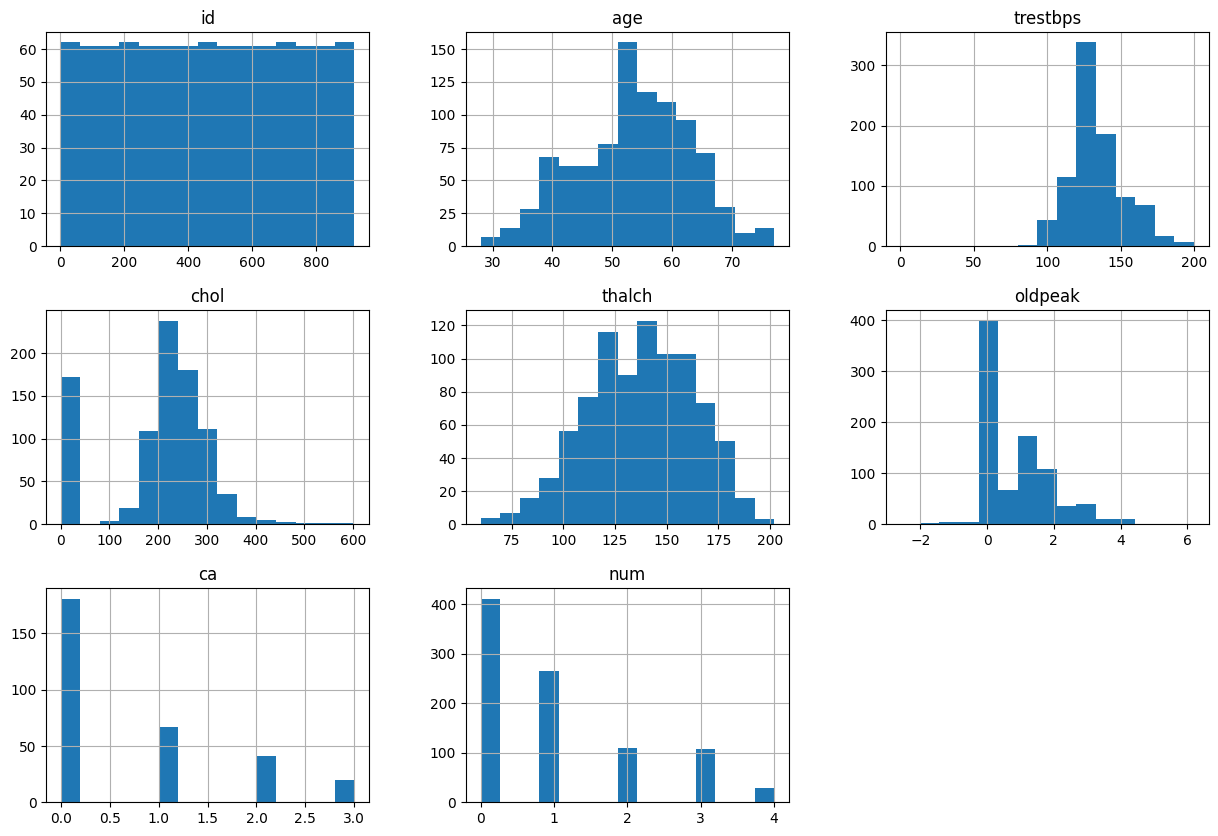

In [ ]:
import matplotlib.pyplot as plt
df_heart.hist(bins=15, figsize=(15, 10))
plt.show()

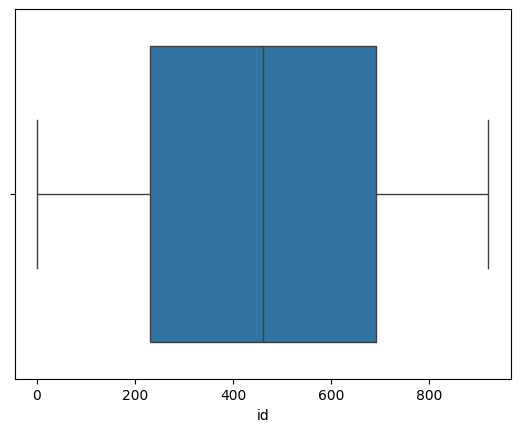

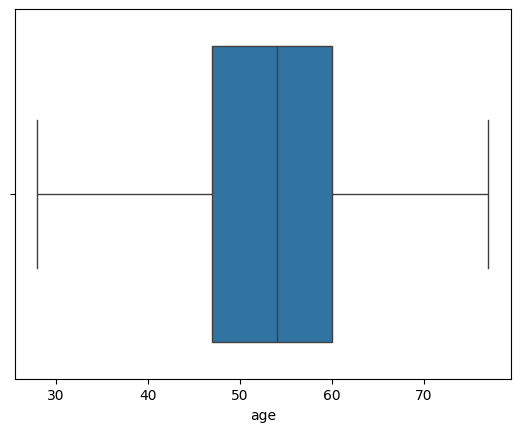

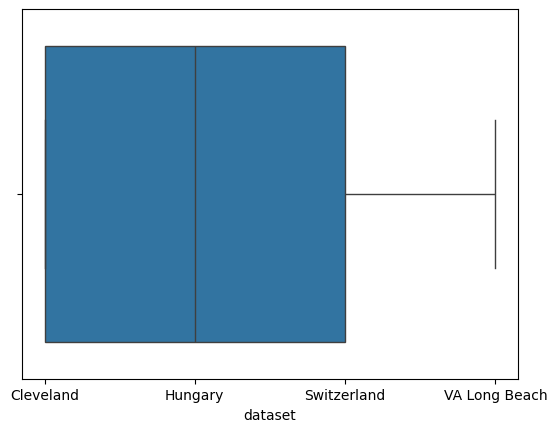

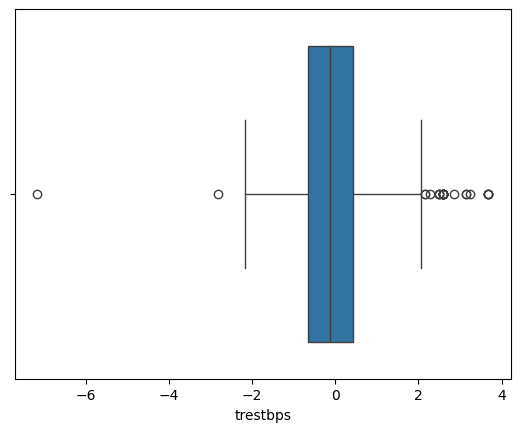

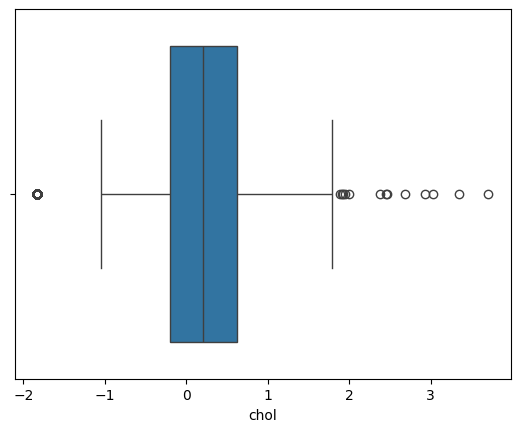

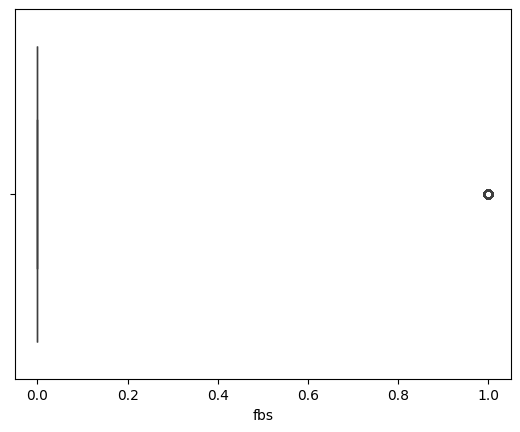

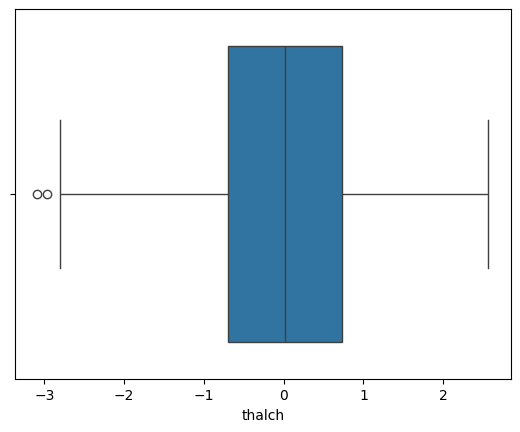

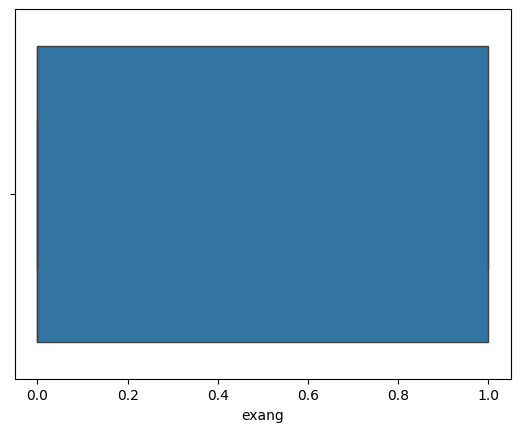

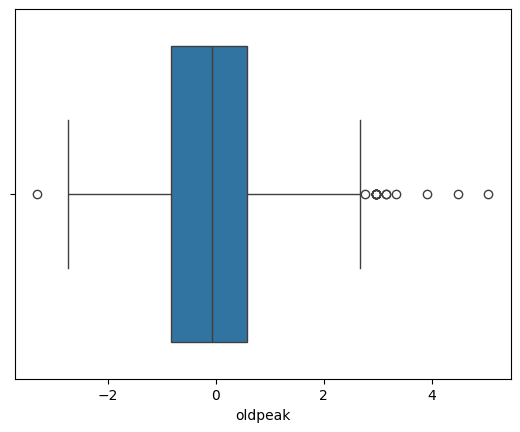

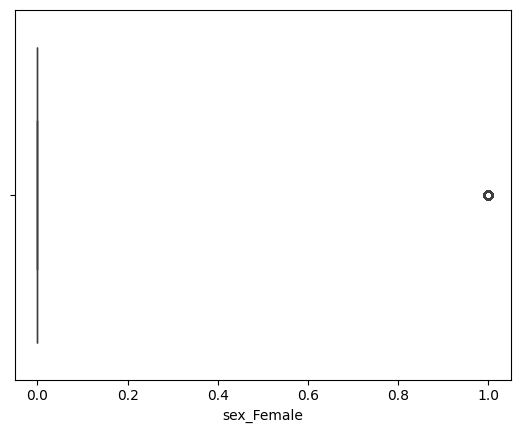

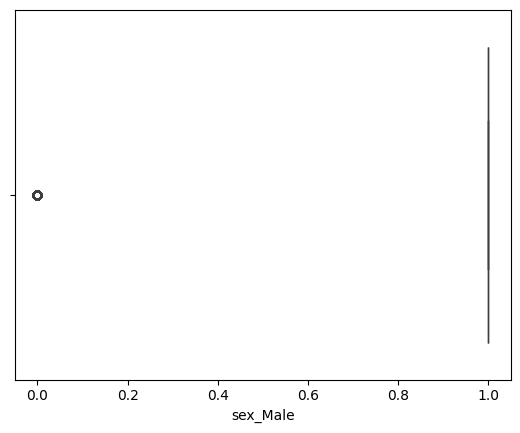

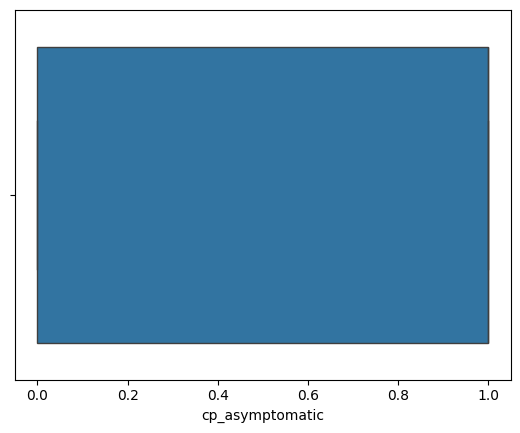

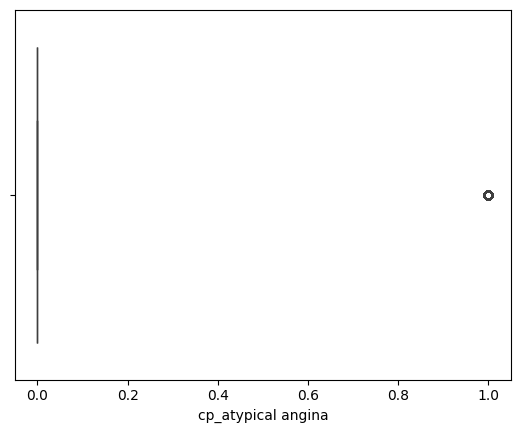

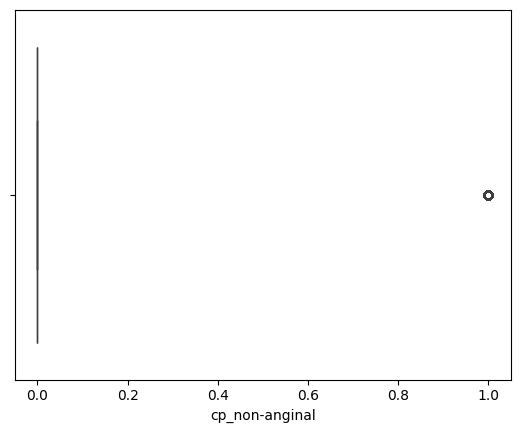

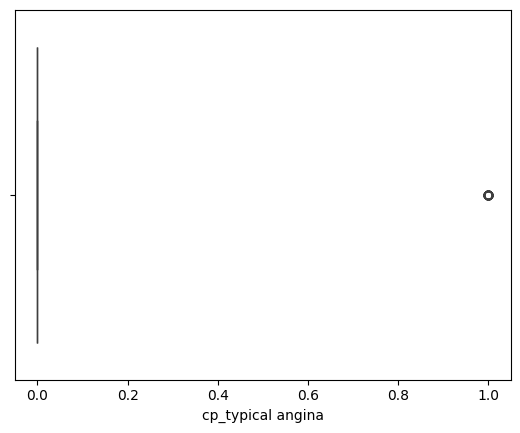

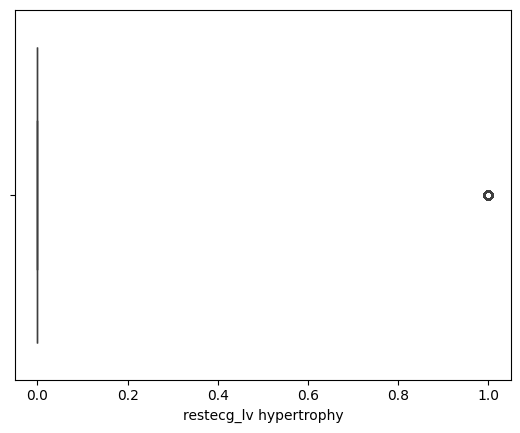

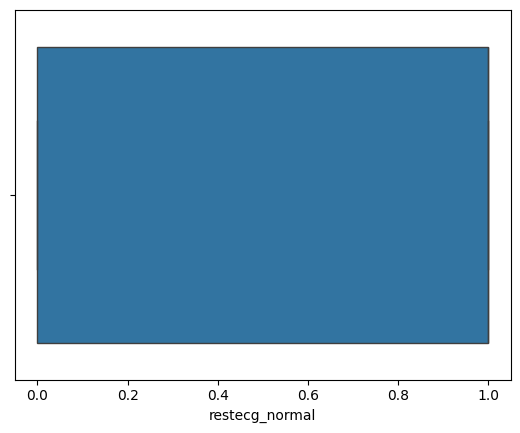

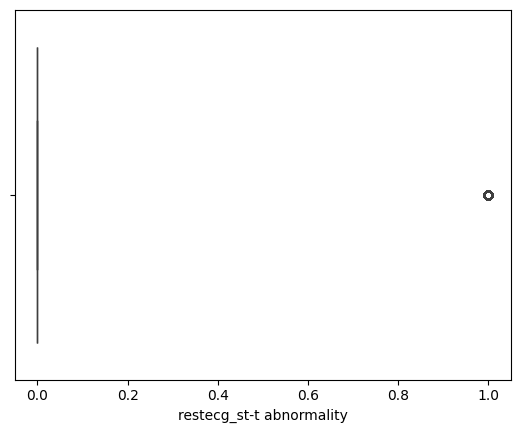

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
  sns.boxplot(x=X[col])
  plt.show()


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [30]:
df_heart = df_heart.drop(columns=['id'])

In [11]:
df_heart['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [31]:
df_heart.drop(['dataset'], axis=1, inplace=True)

In [32]:
df_heart.drop(columns=['slope', 'thal','ca'], axis=1, inplace=True)


In [33]:
non_numeric_columns = df_heart.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

heart_data_numeric = df_heart.drop(columns=non_numeric_columns)

heart_data_numeric.fillna(heart_data_numeric.median(), inplace=True)

heart_data_cleaned = pd.concat([heart_data_numeric, df_heart[non_numeric_columns]], axis=1)

print("Null values after cleaning in the whole dataset:", heart_data_cleaned.isnull().sum())

Non-numeric columns: Index(['sex', 'cp', 'fbs', 'restecg', 'exang'], dtype='object')
Null values after cleaning in the whole dataset: age          0
trestbps     0
chol         0
thalch       0
oldpeak      0
num          0
sex          0
cp           0
fbs         90
restecg      2
exang       55
dtype: int64


In [26]:
heart_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   trestbps  920 non-null    float64
 2   chol      920 non-null    float64
 3   thalch    920 non-null    float64
 4   oldpeak   920 non-null    float64
 5   num       920 non-null    int64  
 6   sex       920 non-null    object 
 7   cp        920 non-null    object 
 8   fbs       830 non-null    object 
 9   restecg   918 non-null    object 
 10  exang     865 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 79.2+ KB


In [17]:
heart_data_cleaned['restecg']

0        lv hypertrophy
1        lv hypertrophy
2        lv hypertrophy
3                normal
4        lv hypertrophy
             ...       
915    st-t abnormality
916    st-t abnormality
917    st-t abnormality
918      lv hypertrophy
919      lv hypertrophy
Name: restecg, Length: 920, dtype: object

In [18]:
heart_data_cleaned.dropna(inplace=True)

In [19]:
heart_data_cleaned.isnull().sum()

age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
num         0
sex         0
cp          0
fbs         0
restecg     0
exang       0
dtype: int64

In [28]:
heart_data_cleaned.shape()

TypeError: 'tuple' object is not callable

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
    return df[filtered_entries]

# heart_data_cleaned = remove_outliers_iqr(heart_data_cleaned, 'chol')
# heart_data_cleaned = remove_outliers_iqr(heart_data_cleaned, 'thalch')
# heart_data_cleaned = remove_outliers_iqr(heart_data_cleaned, 'oldpeak')

heart_data_cleaned.shape

(372, 14)

In [ ]:
heart_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       774 non-null    int64  
 1   trestbps  774 non-null    float64
 2   chol      774 non-null    float64
 3   thalch    774 non-null    float64
 4   oldpeak   774 non-null    float64
 5   num       774 non-null    int64  
 6   sex       774 non-null    object 
 7   cp        774 non-null    object 
 8   fbs       774 non-null    object 
 9   restecg   774 non-null    object 
 10  exang     774 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 72.6+ KB


In [ ]:
heart_data_cleaned.head()

,age,trestbps,chol,thalch,oldpeak,num,sex,cp,fbs,restecg,exang
0,63,145.0,233.0,150.0,2.3,0,Male,typical angina,True,lv hypertrophy,False
1,67,160.0,286.0,108.0,1.5,2,Male,asymptomatic,False,lv hypertrophy,True
2,67,120.0,229.0,129.0,2.6,1,Male,asymptomatic,False,lv hypertrophy,True
3,37,130.0,250.0,187.0,3.5,0,Male,non-anginal,False,normal,False
4,41,130.0,204.0,172.0,1.4,0,Female,atypical angina,False,lv hypertrophy,False


In [ ]:
heart_data_cleaned['fbs'] = heart_data_cleaned['fbs'].replace({True: 1, False: 0})
heart_data_cleaned['exang'] = heart_data_cleaned['exang'].replace({True: 1, False: 0})

In [ ]:
heart_data_cleaned = pd.get_dummies(heart_data_cleaned, columns=['sex', 'restecg', 'cp'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in heart_data_cleaned.select_dtypes(include='object'):
    heart_data_cleaned[col] = le.fit_transform(heart_data_cleaned[col])


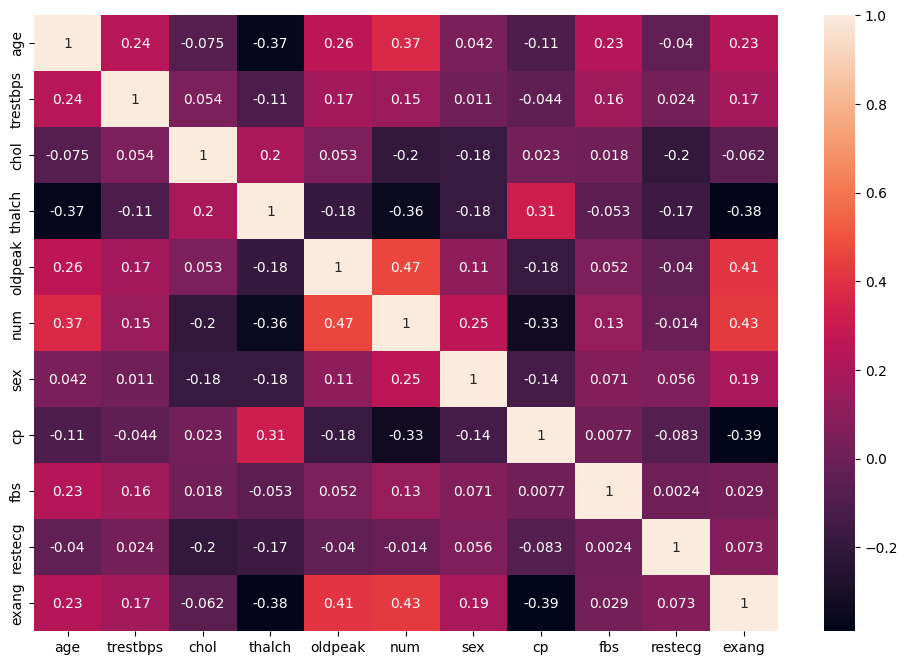

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(heart_data_cleaned.corr(), annot=True)
plt.show()


In [ ]:
heart_data_cleaned

,age,trestbps,chol,thalch,oldpeak,num,sex,cp,fbs,restecg,exang
0,63,145.0,233.0,150.0,2.3,0,1,3,1,0,0
1,67,160.0,286.0,108.0,1.5,2,1,0,0,0,1
2,67,120.0,229.0,129.0,2.6,1,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,1,2,0,1,0
4,41,130.0,204.0,172.0,1.4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,62,158.0,170.0,138.0,0.0,1,1,0,0,2,1
914,46,134.0,310.0,126.0,0.0,2,1,0,0,1,0
915,54,127.0,333.0,154.0,0.0,1,0,0,1,2,0
917,55,122.0,223.0,100.0,0.0,2,1,0,1,2,0


In [ ]:
#heart_data_cleaned.drop(columns=['sex_Male'], inplace=True)

#heart_data_cleaned['sex_Female'] = heart_data_cleaned['sex_Female'].replace({True: 1, False: 0})
#heart_data_cleaned['restecg_lv hypertrophy'] = heart_data_cleaned['restecg_lv hypertrophy'].replace({True: 1, False: 0})
#heart_data_cleaned['restecg_normal'] = heart_data_cleaned['restecg_normal'].replace({True: 1, False: 0})
#heart_data_cleaned['restecg_st-t abnormality'] = heart_data_cleaned['restecg_st-t abnormality'].replace({True: 1, False: 0})
#heart_data_cleaned['cp_asymptomatic'] = heart_data_cleaned['cp_asymptomatic'].replace({True: 1, False: 0})
#heart_data_cleaned['cp_atypical angina'] = heart_data_cleaned['cp_atypical angina'].replace({True: 1, False: 0})
#heart_data_cleaned['cp_non-anginal'] = heart_data_cleaned['cp_non-anginal'].replace({True: 1, False: 0})
#heart_data_cleaned['cp_typical angina'] = heart_data_cleaned['cp_typical angina'].replace({True: 1, False: 0})

#heart_data_cleaned.head()


,age,trestbps,chol,thalch,oldpeak,num,fbs,exang,sex_Female,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,145.0,233.0,150.0,2.3,0,1,0,0,1,0,0,0,0,0,1
1,67,160.0,286.0,108.0,1.5,2,0,1,0,1,0,0,1,0,0,0
2,67,120.0,229.0,129.0,2.6,1,0,1,0,1,0,0,1,0,0,0
3,37,130.0,250.0,187.0,3.5,0,0,0,0,0,1,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0,0,0,1,1,0,0,0,1,0,0


In [ ]:
X = heart_data_cleaned.drop(columns=['num'])
y = heart_data_cleaned['num']

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)


NameError: name 'X' is not defined

In [ ]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.57
Precision: 0.51
Recall: 0.57
F1 Score: 0.54


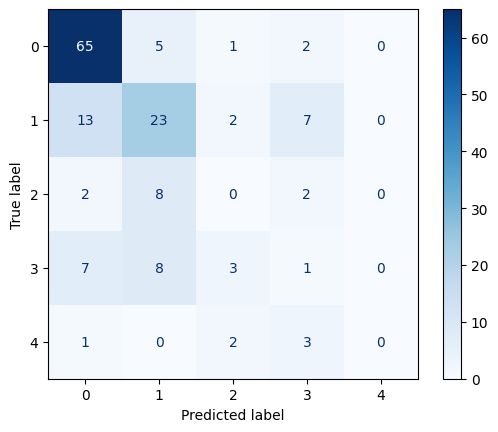

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()